In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/project3'

/content/drive/MyDrive/project3


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("./datasetCNN.csv")
train = data.sample(frac =.8)
val = data.sample(frac = .1)
test = data.sample(frac =.1)
X_train = train.to_numpy()[: , :-1]
Y_train = train.to_numpy()[: , 1400:]
train, val, test

(      0.27058823529411763  0.0  0.0196078431372549  ...  0.20  0.21  1
 1817             0.270588  0.0            0.000000  ...     0     0  2
 223              0.270588  0.0            0.019608  ...     0     0  1
 1369             0.270588  0.0            0.000000  ...     0     0  2
 6                0.270588  0.0            0.019608  ...     0     0  1
 117              0.270588  0.0            0.019608  ...     0     0  1
 ...                   ...  ...                 ...  ...   ...   ... ..
 1958             0.270588  0.0            0.019608  ...     0     0  2
 1350             0.270588  0.0            0.019608  ...     0     0  2
 14               0.270588  0.0            0.019608  ...     0     0  1
 1754             0.270588  0.0            0.000000  ...     0     0  2
 1372             0.270588  0.0            0.019608  ...     0     0  2
 
 [1599 rows x 1401 columns],
       0.27058823529411763  0.0  0.0196078431372549  ...  0.20  0.21  1
 1884             0.270588  0.0  

In [4]:
X_val = val.to_numpy()[: , :-1]
Y_val = val.to_numpy()[: , 1400:]
X_val.shape, Y_val.shape

((200, 1400), (200, 1))

In [5]:
X_test = test.to_numpy()[: , :-1]
Y_test = test.to_numpy()[: , 1400:]
X_test.shape, Y_test.shape

((200, 1400), (200, 1))

In [6]:
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, AveragePooling1D, Input
from keras.utils import np_utils
from keras.datasets import mnist

model = Sequential()

# model.add(Conv2D(500,(5,1), padding="same",activation="relu", input_shape = (1,1400,1)))
# model.add(Conv2D(100, (4,1), padding="same", activation="relu"))
# model.add(AveragePooling2D(pool_size=(1,2)))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(500, activation='relu'))
# model.add(Dense(3, activation='relu'))
# model.add(Dense(10, activation='softmax'))


inputs = Input(shape=(1400, 1))
conv1 = Conv1D(
    filters=550,
    kernel_size=5,
    activation='relu',
)(inputs)
conv2 = Conv1D(
    filters=100,
    kernel_size=4,
    activation='relu'
)(conv1)

avgPool1 = AveragePooling1D(pool_size=2, strides=1)(conv2)
flatten = Flatten()(avgPool1)
dense1 = Dense(units=100, activation='relu')(flatten)
dense2= Dense(units=500, activation='relu')(dense1)
outputs = Dense(10, activation='softmax')(dense2)

model = Model(inputs, outputs)

model.summary()


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

H = model.fit(X_train, Y_train, validation_data=(X_val,Y_val), batch_size=32, epochs=10, verbose=1)

fig = plt.figure()
numOfEpoch = 10


# plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1400, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1396, 550)         3300      
                                                                 
 conv1d_1 (Conv1D)           (None, 1393, 100)         220100    
                                                                 
 average_pooling1d (AverageP  (None, 1392, 100)        0         
 ooling1D)                                                       
                                                                 
 flatten (Flatten)           (None, 139200)            0         
                                                                 
 dense (Dense)               (None, 100)               13920100  
                                                             

<Figure size 432x288 with 0 Axes>

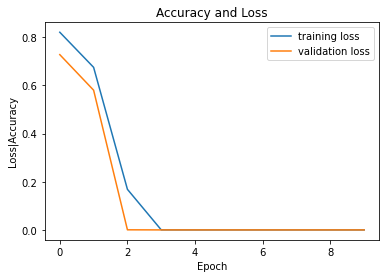

In [7]:
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()


In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[1.63970366884314e-06, 1.0]


In [9]:
y_predict = model.predict(X_test[3].reshape(1,1400,1))
print(np.argmax(y_predict))
print(Y_test[3])
Y_test

2
[2.]


array([[1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],